https://bit.ly/DSN-7-ab

#  Дисперсионный анализ


<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>



In [1]:
# Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns


Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
30.0=24.0+6.0


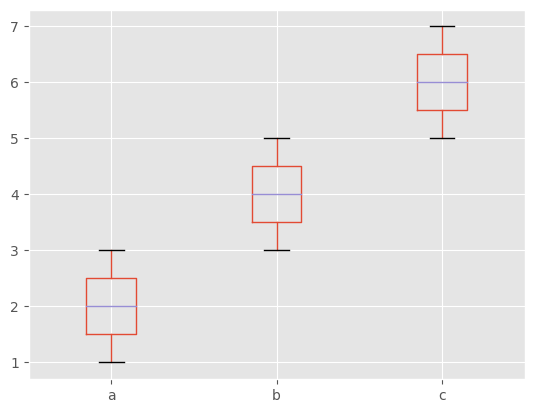

In [2]:
# Выборки которые надо сравнить
data = pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')

# общая средняя
grand_mean = data.values.mean()

# Общая сумма квадратов sst = ssb + ssw
sst = ((data - grand_mean)**2).values.sum()

# отклонение групповых средний от общей средней
ssb = (data.count(axis=0) * (data.mean(axis=0) - grand_mean) ** 2).values.sum()

# отклонения значений внутри группы от средней группы
ssw = ((data - data.mean(axis=0)) ** 2).values.sum()

print(f'{sst}={ssb}+{ssw}')

$$ MS_{within} = \frac{SS_{within}}{N-k} $$
$$ MS_{between} = \frac{SS_{between}}{k-1} $$
$$ F = \frac{MS_{between}}{MS_{within}} $$

In [3]:
groups = data.shape[1]

# межгрупповой средний квадрат
dfb = groups - 1
msb = ssb/dfb

# внутригрупповой средний квадрат
dfw = data.size - groups
msw = ssw/dfw

f_value = msb/msw

p = stats.f.sf(f_value, dfb, dfw)
print(f'Результат: (pvalue = {p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f_value}")

Результат: (pvalue = 0.008000000000000002)
отклоняем нулевую гипотезу
Полученное f-значение 12.0


In [4]:
[*data.values.T]

[array([3, 1, 2], dtype=int64),
 array([5, 3, 4], dtype=int64),
 array([7, 6, 5], dtype=int64)]

In [5]:
stats.f_oneway(*data.values.T)

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

<img src='https://drive.google.com/uc?id=1SM_uGauFjQsVtHqQQWagdx3d8GVpb-n7'>

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/ 



### Задача 1.1
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам. Какие выводы можно сделать, понаблюдав за тем, как распределены данные и что показывают тесты?

In [6]:
df = pd.DataFrame([[25, 45, 30, 54],
                   [30, 55, 29, 60],
                   [28, 29, 33, 51],
                   [36, 56, 37, 62],
                   [29, 40, 27, 73]],
                   columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


<AxesSubplot: >

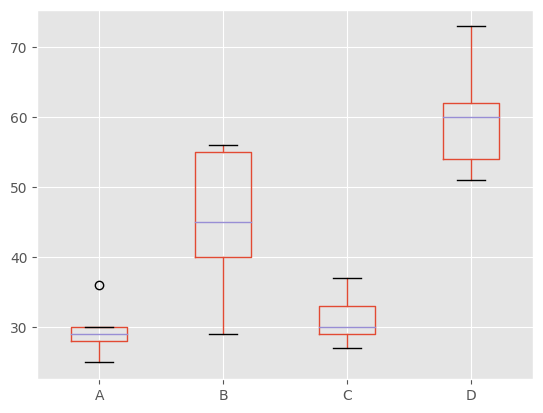

In [7]:
df.boxplot()

In [8]:
df_grand_mean = df.values.mean()
df_sst = ((df - df_grand_mean)**2).values.sum()
df_ssb = (df.count(axis=0) * (df.mean(axis=0) - df_grand_mean) ** 2).values.sum()
df_ssw = ((df - df.mean(axis=0))**2).values.sum()

In [9]:
print(f'df grand mean: {df_grand_mean}')
print(f'df SSTot: {df_sst}')
print(f'df SSBetween: {df_ssb}')
print(f'df SSWithin: {df_ssw}')

df grand mean: 41.45
df SSTot: 3928.95
df SSBetween: 3010.95
df SSWithin: 918.0


In [10]:
df_groups = df.shape[1]

# межгрупповой средний квадрат
df_groups_b = df_groups - 1
ms_groups_b = df_ssb/df_groups_b

# внутригрупповой средний квадрат
df_groups_w = df.size - df_groups
ms_groups_w = df_ssw/df_groups_w

df_f_value = ms_groups_b/ms_groups_w

df_p = stats.f.sf(df_f_value, df_groups_b, df_groups_w)
print(f'Результат: (pvalue = {df_p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {df_f_value}")

Результат: (pvalue = 2.6392411462109217e-05)
отклоняем нулевую гипотезу
Полученное f-значение 17.492810457516338


In [11]:
df_experimental_0 = df.loc[:, ['A', 'B']]
df_experimental_0

,A,B
0,25,45
1,30,55
2,28,29
3,36,56
4,29,40


In [12]:
df_experimental_1 = df.loc[:, ['B', 'C']]
df_experimental_2 = df.loc[:, ['B', 'D']]

In [13]:
print(stats.f_oneway(*df_experimental_0.values.T))
print(stats.f_oneway(*df_experimental_1.values.T))
print(stats.f_oneway(*df_experimental_2.values.T))

F_onewayResult(statistic=8.362482369534556, pvalue=0.020143585933298517)
F_onewayResult(statistic=6.767590618336887, pvalue=0.031546185835632935)
F_onewayResult(statistic=5.681818181818182, pvalue=0.044292181872168566)


Выводы:

1) Судя по результатам теста Фишера, а также визуально по боксплоту, данные статистически отличаются - значение p-value менее 0.05. 
2) Однако на графике мы видим, что группа D действительно статистически отличается от групп A и С, однако имеется перекрытие между графиками A-B, B-C и B-D, что может свидетельствовать (насколько я помню из курса медицинской статистики, но могу ошибаться) о том, что средние значения этих групп могут совпадать. Поэтому для эксперимента я выделил соответствующие группы из датафрейма и сравнил их между собой. Все же, значения p-value между этими группами составили < 0.05, значит эти группы статистически отличаются и мы можем отвергнуть Н0.

### Задача 1.2    
    
Есть данные об измерении раковины у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.

In [14]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [15]:
oysters = pd.DataFrame({'tillamok': tillamook, 
                        'newport': np.append(newport, np.zeros(2)), 
                        'petersburg':np.append(petersburg, np.zeros(3)), 
                        'magadan':np.append(magadan, np.zeros(2)), 
                        'tvarminne': np.append(tvarminne, np.zeros(4))                        
                        })
oysters.replace(0.0, oysters.median(axis=0), inplace=True)
print(oysters)

   tillamok  newport  petersburg  magadan  tvarminne
0    0.0571  0.08730      0.0974   0.1033    0.07030
1    0.0813  0.06620      0.1352   0.0915    0.10260
2    0.0831  0.06720      0.0817   0.0781    0.09560
3    0.0976  0.08190      0.1016   0.0685    0.09730
4    0.0817  0.07490      0.0968   0.0677    0.10390
5    0.0859  0.06490      0.1064   0.0697    0.10450
6    0.0735  0.08350      0.1050   0.0764    0.08295
7    0.0659  0.07250      0.0971   0.0689    0.08295
8    0.0923  0.06985      0.0971   0.0693    0.08295
9    0.0836  0.06985      0.0971   0.0693    0.08295


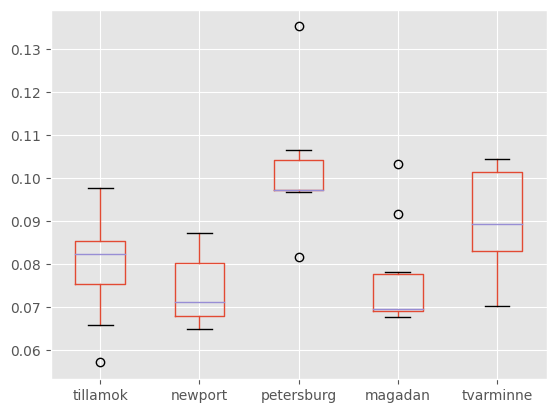

In [16]:
oysters.boxplot()
plt.show()

In [17]:
print(stats.f_oneway(*oysters.values.T))

F_onewayResult(statistic=9.851714429324801, pvalue=8.215829591722005e-06)


<strike>Вывод: согласно F-критерию Фишера, значение p-value > 0.05 не позволяет нам исключить Н0, т.е. выборки не могут считаться статистически различными.<strike>

Ошибка исправлена:

Вывод: согласно F-критерию Фишера, значение p-value < 0.05 позволяет нам исключить Н0, т.е. выборки могут считаться статистически различными.

<span> не совсем понял часть вопроса о том, если удастся разделить выборки в группе: каким образом необходимо выделять выборки (2 города в одной выборке и 3 в другой)? По их статистической однородности или наоборот, по разнородности? Поэтому выбрал первый вариант, разделил их на 2 группы: 1) tillamok, newport, magadan, 2) petersburg, tvarmine <span>

In [18]:
til_new_mag = np.array(tillamook + newport + magadan)
pet_tvarm = np.append(np.array(petersburg + tvarminne), np.zeros(13))

print(til_new_mag, til_new_mag.shape)
print(pet_tvarm, pet_tvarm.shape)

[0.0571 0.0813 0.0831 0.0976 0.0817 0.0859 0.0735 0.0659 0.0923 0.0836
 0.0873 0.0662 0.0672 0.0819 0.0749 0.0649 0.0835 0.0725 0.1033 0.0915
 0.0781 0.0685 0.0677 0.0697 0.0764 0.0689] (26,)
[0.0974 0.1352 0.0817 0.1016 0.0968 0.1064 0.105  0.0703 0.1026 0.0956
 0.0973 0.1039 0.1045 0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.    ] (26,)


In [19]:
oysters_groupped = pd.DataFrame({'til_new_mag':til_new_mag, 'pet_tvarm':pet_tvarm})
oysters_groupped.replace(0.0, oysters_groupped.median(axis=0), inplace=True)

print(oysters_groupped)

    til_new_mag  pet_tvarm
0        0.0571    0.09740
1        0.0813    0.13520
2        0.0831    0.08170
3        0.0976    0.10160
4        0.0817    0.09680
5        0.0859    0.10640
6        0.0735    0.10500
7        0.0659    0.07030
8        0.0923    0.10260
9        0.0836    0.09560
10       0.0873    0.09730
11       0.0662    0.10390
12       0.0672    0.10450
13       0.0819    0.03515
14       0.0749    0.03515
15       0.0649    0.03515
16       0.0835    0.03515
17       0.0725    0.03515
18       0.1033    0.03515
19       0.0915    0.03515
20       0.0781    0.03515
21       0.0685    0.03515
22       0.0677    0.03515
23       0.0697    0.03515
24       0.0764    0.03515
25       0.0689    0.03515


<AxesSubplot: >

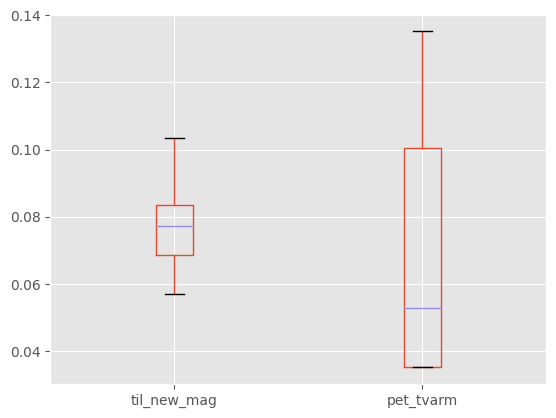

In [20]:
oysters_groupped.boxplot()

In [21]:
print(stats.f_oneway(*oysters_groupped.values.T))

F_onewayResult(statistic=2.115918817680145, pvalue=0.15202391416057812)


После группировки данных у меня также получилось, что значение p-value > 0.05, то есть эти группы статистически не разнородны и мы не можем отклонить Н0. Так как я не совсем понял задание, мог ошибиться с его выполнением, поэтому если что, объясните пожалуйста мои ошибки в выполнении.

# Почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выборке**

Чтобы выяснить это, сделаем эксперемент.

In [22]:
from numpy import random
from scipy.stats import t


def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает False'''
    n_samples = samples.shape[0]
  
    for i in range(n_samples):
        for j in range(i+1, n_samples):
           _, p = stats.ttest_ind(samples[:, i], samples[:, j])

           if p < alpha:
              return True
           
    return False


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = 0
    for _ in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result += pair_t(samples, alpha)

    pd.Series([result, repeat-result], index=[False, True]).plot.pie(ax=ax, autopct='%.0f%%')
    ax.set_ylabel('')

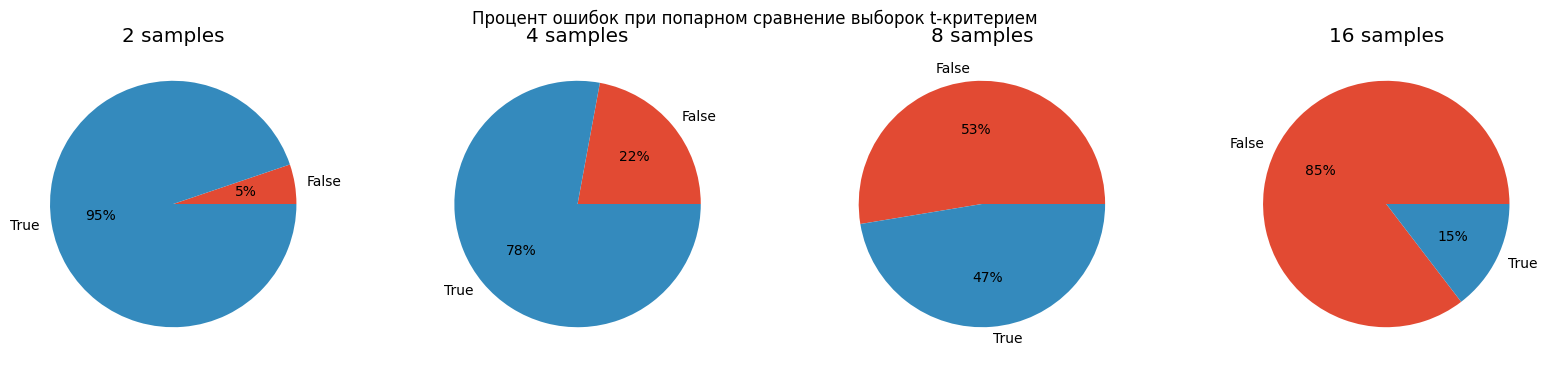

In [23]:
n_samples = [2, 4, 8, 16]
fig, axs = plt.subplots(ncols=len(n_samples), figsize=(20, 4))

fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(repeat=1000,
                n_samples=n,
                sample_size=30,
                ax=ax)
    ax.set_title(f'{n} samples')

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

<img src='https://drive.google.com/uc?id=16sIvImkH2BK2n3OUBUWrT4z8QFC4nyL8'>

# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.




### Задание 2.1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

<AxesSubplot: >

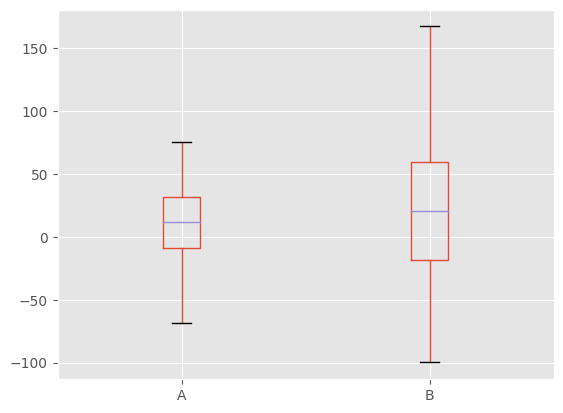

In [24]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

drug_test_ind = pd.DataFrame({'A':A, 'B':B})

drug_test_ind.boxplot()

In [25]:
print(stats.ttest_ind(drug_test_ind.loc[:, 'A'], drug_test_ind.loc[:, 'B']))

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)


Вывод: p-value > 0.05, поэтому мы не можем отвергнуть Н0 (мы не можем сказать что выборки статистически отличаются)

### Задание 2.2

Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей до применения препарата.

`B` - та же группа людей, но после применения препарата.

<AxesSubplot: >

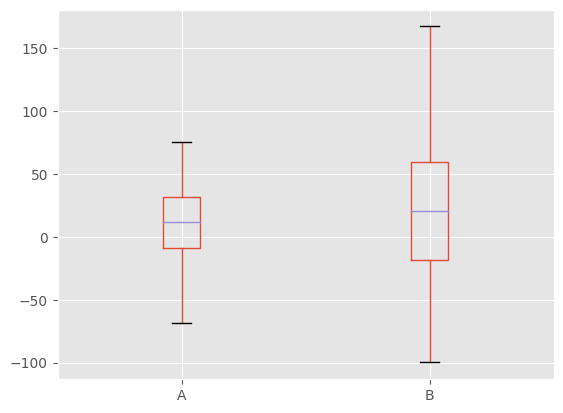

In [26]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

drug_test_rel = pd.DataFrame({'A':A, 'B':B})

drug_test_rel.boxplot()

In [27]:
print(stats.ttest_rel(drug_test_rel.loc[:, 'A'], drug_test_rel.loc[:, 'B']))

Ttest_relResult(statistic=-2.170170373521071, pvalue=0.03238579156467659)


Вывод: pvalue < 0.05, поэтому мы можем отвергнуть Н0 и заключить что выборки статистически отличаются.

### Задание 2.3

Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [28]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1, 2] # добавил в конец массива 2 (мода для воды)
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.

cucumber_growth = pd.DataFrame({'water':water, 'nutri':nutri, 'mineral':mineral})
# cucumber_growth.replace(0, cucumber_growth.mode(), inplace=True)
cucumber_growth



,water,nutri,mineral
0,1,1,2
1,2,2,1
2,3,4,1
3,4,6,3
4,2,5,2
5,4,6,4
6,2,7,2
7,4,5,4
8,5,4,5
9,2,5,4


<AxesSubplot: >

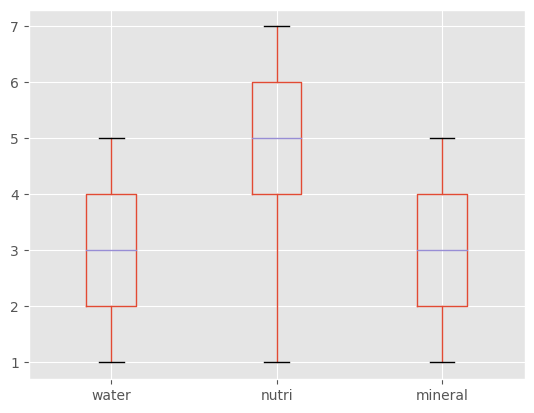

In [29]:
cucumber_growth.boxplot()

In [30]:
print(stats.f_oneway(*cucumber_growth.values.T))

F_onewayResult(statistic=13.033419023136256, pvalue=1.9927924614879063e-05)


Вывод: p-value > 0.05, поэтому мы не можем отвергнуть Н0 (мы не можем сказать что выборки статистически отличаются)

### Задание 2.4

Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



https://drive.google.com/file/d/1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B

In [31]:
!wget 'https://drive.google.com/uc?id=1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B' -O PlantGrowth.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


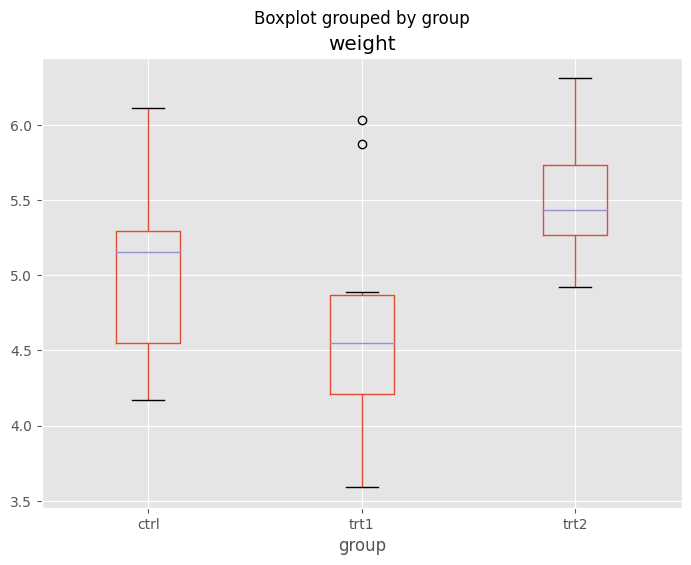

In [32]:
data = pd.read_csv('PlantGrowth.csv', index_col=0)
data.boxplot('weight', by='group', figsize=(8, 6));

In [33]:
print(data.groupby('group').mean())
print(data.groupby('group').median())

       weight
group        
ctrl    5.032
trt1    4.661
trt2    5.526
       weight
group        
ctrl    5.155
trt1    4.550
trt2    5.435


Для анализа статистически значимых отличий между группами решил использовать t-test для несвязанных выборок:

In [34]:
print('Сравнение контрольной группы и 1-го удобрения:', stats.ttest_ind(np.array(data.loc[data['group'] == 'ctrl']['weight']), 
                        np.array(data.loc[data['group'] == 'trt1']['weight'])
                        ))


Сравнение контрольной группы и 1-го удобрения: Ttest_indResult(statistic=1.1912603818487009, pvalue=0.2490231659730067)


In [35]:
print('Сравнение контрольной группы и 2-го удобрения:', stats.ttest_ind(np.array(data.loc[data['group'] == 'ctrl']['weight']), 
                        np.array(data.loc[data['group'] == 'trt2']['weight'])
                        ))

Сравнение контрольной группы и 2-го удобрения: Ttest_indResult(statistic=-2.1340204531240654, pvalue=0.04685138491157359)


In [36]:
print('Сравнение 1-го и 2-го удобрений:', stats.ttest_ind(np.array(data.loc[data['group'] == 'trt1']['weight']), 
                        np.array(data.loc[data['group'] == 'trt2']['weight'])
                        ))

Сравнение 1-го и 2-го удобрений: Ttest_indResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574)


Выводы:
1) По графику, а также по средними и медианам мы видим, что масса овощей, выращенных с использованием 2-го удобрения, выше, чем в контрольной группе и в группе, в которой использовалось 1-е удобрение
2) 1-е удобрение статистически не отличается от контрольной группы
3) Более высокая масса овощей, выращенных с использованием 3-го удобрения, статистически значима по сравнению с контрольной группой и с группой с 1-м удобрением
4) Использование 2-го вида удобрения более эффективно

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

## Данные A/B тестирования

https://drive.google.com/file/d/1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB

In [37]:
!wget 'https://drive.google.com/uc?id=1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB' -O cookie_cats.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [38]:
data = pd.read_csv('cookie_cats.csv')  # Открыл датасет
data = data.loc[data['sum_gamerounds'] < 200] # Ограничил выбросы (когда я это делал, я не знал, что это будет сделано ниже, просто по боксплоту было много выбросов выше 150, я решил их немного ограничить. Вначале ограничил на более высоком уровне (начал с 500), потом подсмотрел у вас значение 200 и оставил его.)
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

### Задание 3.1

In [39]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    42071
gate_40    42846
Name: version, dtype: int64

In [40]:
data.groupby('version').sum()[['sum_gamerounds', 'retention_1', 'retention_7']]

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,1325994,17572,6270
gate_40,1351136,17657,6036


In [41]:
data.groupby('version').mean()[['sum_gamerounds', 'retention_1', 'retention_7']]

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,31.518005,0.417675,0.149034
gate_40,31.534706,0.412104,0.140877


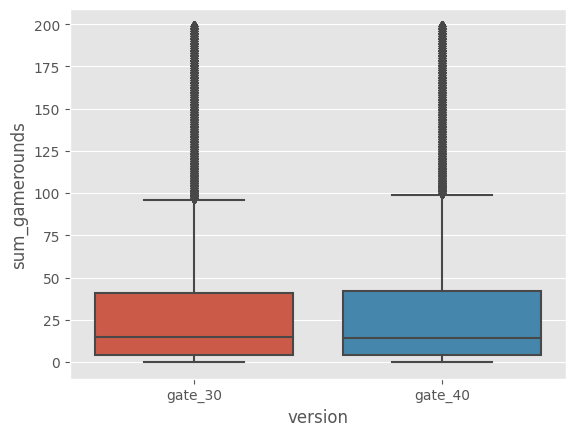

In [42]:
sns.boxplot(data=data, x='version', y='sum_gamerounds');  # данные с меньшим количеством выбросов

In [43]:
# Разделил данные на 2 группы по уровням, после которых разработчики установили "ворота"

data_gate_30 = data.loc[data['version'] == 'gate_30']
data_gate_40 = data.loc[data['version'] == 'gate_40']

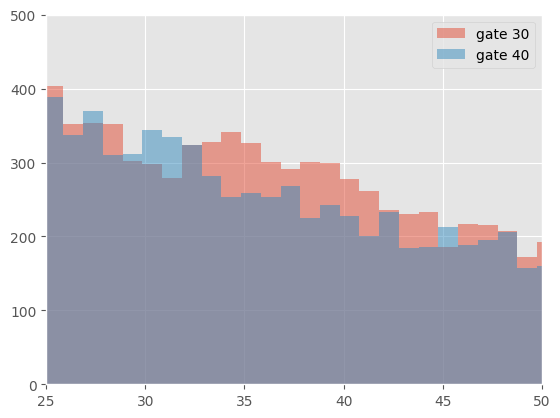

In [44]:
# Вначале получился такой же график, как у вас ниже, я просто увеличил диапазон, в котором были отличия

plt.hist(data_gate_30['sum_gamerounds'], bins=200, alpha=0.5, label='gate 30')
plt.hist(data_gate_40['sum_gamerounds'], bins=200, alpha=0.5, label='gate 40')
plt.xlim((25, 50))
plt.ylim((0, 500))
plt.legend()

In [45]:
# Ваши выводы
# Выборки в целом выглядят похоже по суммам игровых сессий, как внешне (по боксплотам и гистограмме), так и по описательным статистическим параметрам. 
# Единственное место, где суммы игровых сессий несколько отличаются, это диапазон между 25 и 50 игровыми раундами (сделал увеличенный масштаб этого участка графика) 
# По количеству продолжений на 1й и на 7й дни после ворот обе группы также выглядят достаточно близкими, в группе с установленными воротами на 30м уровне количество игроков, продолживших играть на 1й день после ворот,
# немного меньше, а количество игроков, продолживших играть на 7й день, несколько больше, чем в группе с установленными воротами на 40м уровне

In [46]:
# Проверяю статистическую разнородность выборок по количеству продолжений игр на 1й и на 7й дни при помощи точного теста Фишера:

arraay_30 = np.array(data.groupby('version').sum()[['retention_1', 'retention_7']].loc['gate_30', :])
array_40 = np.array(data.groupby('version').sum()[['retention_1', 'retention_7']].loc['gate_40', :])

x = [arraay_30, array_40]

print(x)

[array([17572,  6270], dtype=int64), array([17657,  6036], dtype=int64)]


In [47]:
oddsratio, pvalue = stats.fisher_exact(x) 

oddsratio, pvalue

(0.9580451305891939, 0.041162416009552005)

In [48]:
# Сырые данные (с выбросами):

raw_data = pd.read_csv('cookie_cats.csv')

In [49]:
# Сырые данные, сгруппированные по сумме:

raw_data.groupby('version').sum()[['sum_gamerounds', 'retention_1', 'retention_7']]

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,2344795,20034,8502
gate_40,2333530,20119,8279


In [50]:
# Точный тест Фишера для сырых данных (с выбросами):

raw_arraay_30 = np.array(raw_data.groupby('version').sum()[['retention_1', 'retention_7']].loc['gate_30', :])
raw_array_40 = np.array(raw_data.groupby('version').sum()[['retention_1', 'retention_7']].loc['gate_40', :])

raw_x = [raw_arraay_30, raw_array_40]

raw_oddsratio, raw_pvalue = stats.fisher_exact(raw_x) 

raw_oddsratio, raw_pvalue

(0.9696568297949711, 0.09433611780557866)

Выводы: 
1) при использовании сырых данных (с выбросами) p-value не позволяет нам отклонить Н0
2) после очистки данных от выбросов разница между выборкой становится статистически значимой, и мы можем отклонить Н0

### Задание 3.2

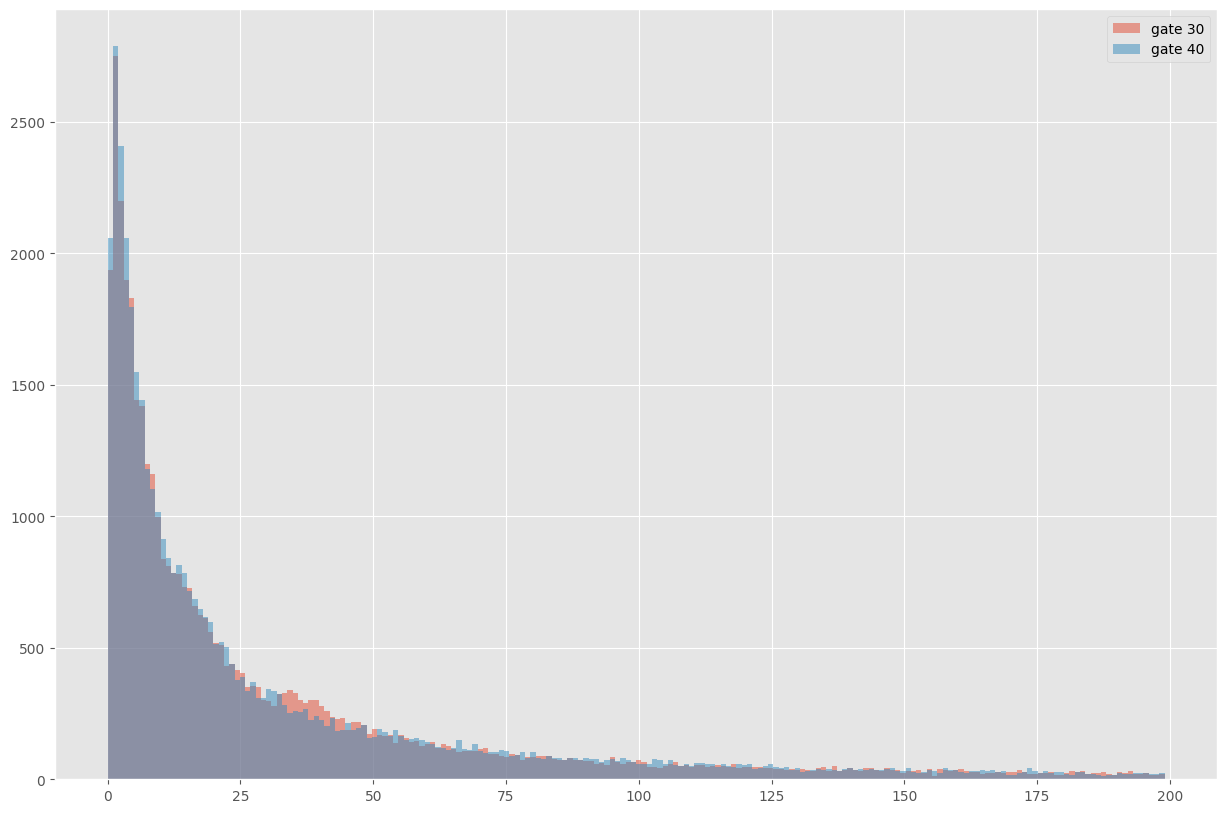

In [51]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30[v_30.sum_gamerounds < 200]
v_40 = v_40[v_40.sum_gamerounds < 200]


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=0.5, label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.5, label='gate 40')
plt.legend(loc='upper right')
plt.show()

### Задание 3.3

In [52]:
# Применяем Bootstrap, чтобы наглядно убедиться в наличии различий
N = 10_000
k = 5_000

X = np.zeros((N, 2))
for i, v in enumerate(['30', '40']):
    v = data[data.version == f'gate_{v}'].retention_7.sample(N*k, replace=True).values.reshape((k, -1))
    print(v.shape)
    X[:, i] = v.mean(axis=0)

(5000, 10000)
(5000, 10000)


In [53]:
X.shape

(10000, 2)

In [54]:
X

array([[0.1448, 0.1488],
       [0.1454, 0.15  ],
       [0.1442, 0.1448],
       ...,
       [0.1452, 0.144 ],
       [0.1462, 0.1346],
       [0.1544, 0.1396]])

<Figure size 1800x800 with 0 Axes>

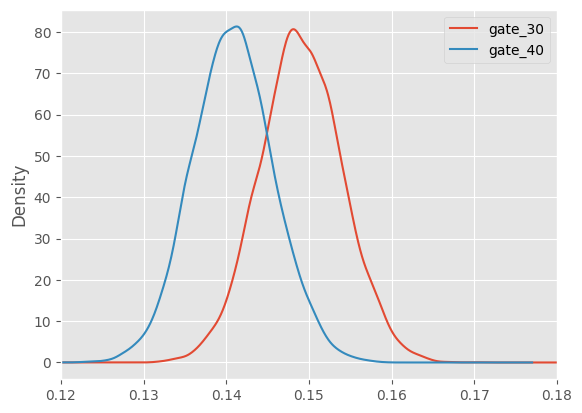

In [55]:
plt.figure(figsize=(18, 8));
ax = pd.DataFrame(X, columns=['gate_30', 'gate_40']).plot(kind='density')
ax.set_xlim(0.12, 0.18);

In [56]:
# сделайте выводы, используя t-тест
# для retention_1

# data_gate_30 = data.loc[data['version'] == 'gate_30']
# data_gate_40 = data.loc[data['version'] == 'gate_40']

# Ваш код.

stats.ttest_ind(np.array(data_gate_30.loc[:, 'retention_1']), np.array(data_gate_40.loc[:, 'retention_1']))


Ttest_indResult(statistic=1.647435232484598, pvalue=0.09947231854440307)

In [57]:
# сделайте выводы, используя t-тест
# для retention_7



# Ваш код.

stats.ttest_ind(np.array(data_gate_30.loc[:, 'retention_7']), np.array(data_gate_40.loc[:, 'retention_7']))

Ttest_indResult(statistic=3.376343391929202, pvalue=0.0007348909245356124)

Вывод: 
1) Для данных продолжения игры пользователями на 1й день различия между группами статистически не значимо.
2) Для данных продолжения игры пользователями на 7й день различия между группами статистически значимо.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

https://drive.google.com/file/d/1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF

In [58]:
!wget 'https://drive.google.com/uc?id=1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF' -O pokemon.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [171]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.sort_values('Name').head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

C:\Users\egoma\AppData\Local\Temp\ipykernel_7544\4141472686.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
510,511,Abomasnow,Grass,Ice,90,92,75,92,85,60,False
68,69,Abra,Psychic,NaN,25,20,15,105,55,90,False
392,393,Absol,Dark,NaN,65,130,60,75,60,75,False
678,679,Accelgor,Bug,NaN,80,70,40,100,60,145,False
750,751,Aegislash Blade Forme,Steel,Ghost,60,150,50,150,50,60,False


### Задание 4.1
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


Text(0.5, 0, 'Rock Pokemons')

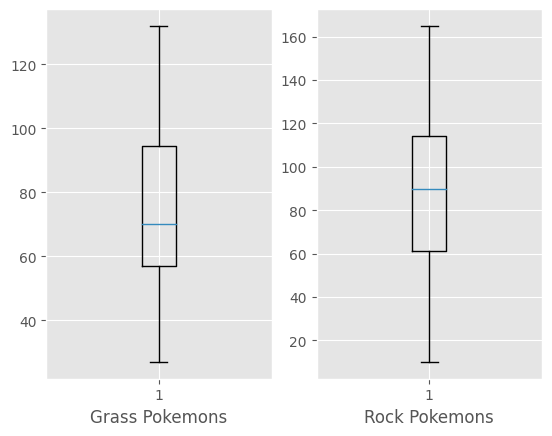

In [79]:
# Ваш код.

grass_pokemons = pokemon.loc[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')]
rock_pokemons = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]

fig, ax = plt.subplots(ncols=2)
ax[0].boxplot(grass_pokemons['Attack'])
ax[0].set_xlabel('Grass Pokemons')
ax[1].boxplot(rock_pokemons['Attack'])
ax[1].set_xlabel('Rock Pokemons')

In [82]:
grass_pokemons['Attack'].median()

70.0

In [83]:
rock_pokemons['Attack'].median()

90.0

In [84]:
stats.ttest_ind(grass_pokemons['Attack'], rock_pokemons['Attack'])

Ttest_indResult(statistic=-3.6123310718800608, pvalue=0.0004125367100834457)

Выводы:
1) У покемонов с классом Rock сила атаки в среднем выше, чем у покемонов класса Grass
2) Различие в атаке между группами покемонов этих двух классов статистически значимо. 

### Задание 4.2

Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Ваш код.

[]

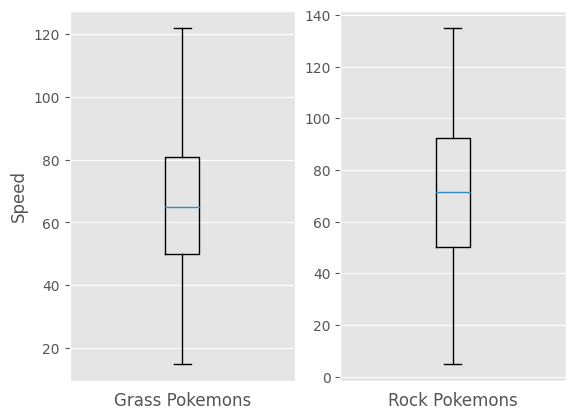

In [92]:
water_pokemons = pokemon.loc[(pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')]
normal_pokemons = pokemon.loc[(pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')]

fig, ax = plt.subplots(ncols=2)
ax[0].boxplot(water_pokemons['Speed'])
ax[0].set_xlabel('Grass Pokemons')
ax[0].set_ylabel('Speed')
ax[0].set_xticks([], [])
ax[1].boxplot(normal_pokemons['Speed'])
ax[1].set_xlabel('Rock Pokemons')
ax[1].set_xticks([], [])

In [93]:
water_pokemons['Speed'].median()

65.0

In [94]:
normal_pokemons['Speed'].median()

71.5

In [95]:
stats.ttest_ind(water_pokemons['Speed'], normal_pokemons['Speed'])

Ttest_indResult(statistic=-2.1520464979893306, pvalue=0.032453585526529216)

Выводы:
1) У покемонов с классом Water скорость атаки в среднем ниже, чем у покемонов класса Normal
2) Различие в атаке между группами покемонов этих двух классов статистически значимо. 

### Задание 4.3

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [98]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [101]:
# Ваш код.

enhanced_pokemons = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]

ordinary_pokemons = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)]

In [170]:
enhanced_pokemons.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [112]:
ordinary_pokemons.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


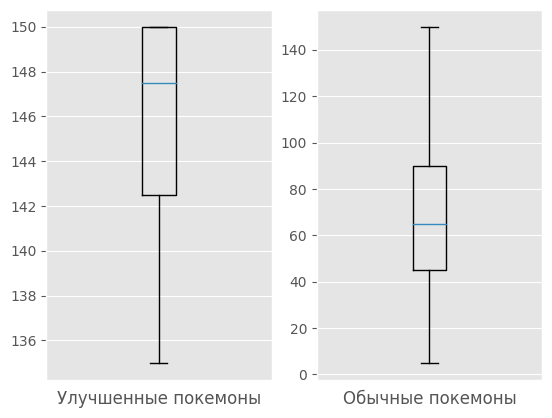

In [116]:
fig, ax = plt.subplots(ncols=2)
ax[0].boxplot(enhanced_pokemons['Speed'])
ax[0].set_xlabel('Улучшенные покемоны')
ax[0].set_xticks([], [])
ax[1].boxplot(ordinary_pokemons.loc[ordinary_pokemons['Speed'] < 152]['Speed']) # было 2 выброса скорости более 152
ax[1].set_xlabel('Обычные покемоны')
ax[1].set_xticks([], [])
plt.show()

In [114]:
enhanced_pokemons['Speed'].median()

147.5

In [115]:
ordinary_pokemons['Speed'].median()

65.0

In [117]:
stats.ttest_ind(enhanced_pokemons['Speed'], ordinary_pokemons.loc[ordinary_pokemons['Speed'] < 152]['Speed'])

Ttest_indResult(statistic=5.486208193925265, pvalue=5.5203166349074706e-08)

Выводы:
1) Скорость покемонов после введения сыворотки улучшилась;
2) Это увеличение статистически значимо.

### Задание 4.4

Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [125]:
# Ваш код.

pokemon['HPAD_Sum'] = pokemon[['HP', 'Attack', 'Defense']].sum(axis=1)
pokemon['HPAD_product'] = pokemon[['HP', 'Attack', 'Defense']].product(axis=1)

legends = pokemon.loc[pokemon['Legendary']]
the_rest = pokemon.loc[~pokemon['Legendary']]


In [126]:
legends.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,HPAD_Sum,HPAD_product
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000


In [127]:
the_rest.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,HPAD_Sum,HPAD_product
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


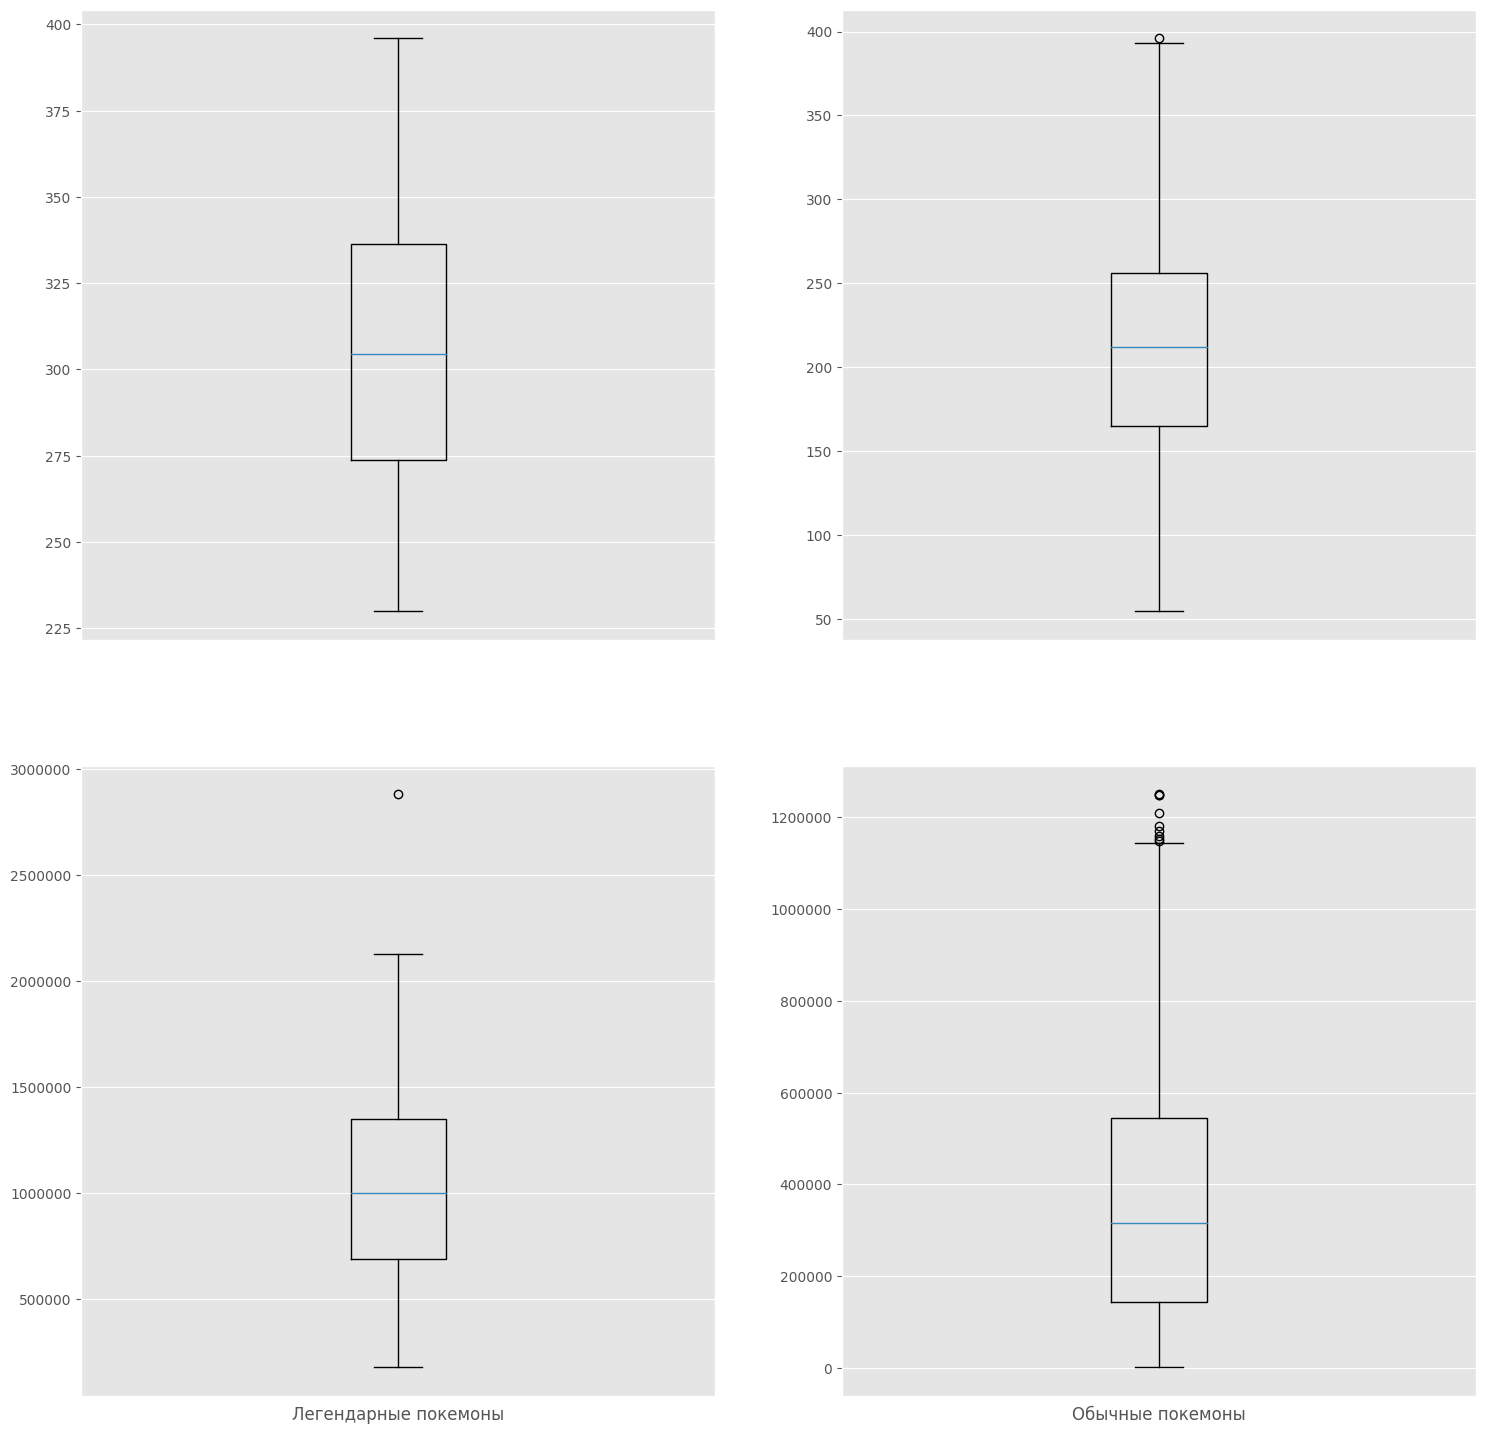

In [152]:
fig, ax = plt.subplots(ncols=2, nrows=2)
ax[1,0].ticklabel_format(style="plain")
ax[1,1].ticklabel_format(style="plain")
plt.rcParams["figure.figsize"] = (18, 18)

ax[0,0].boxplot(legends.loc[legends['HPAD_Sum'] <=400]['HPAD_Sum'])
ax[0,0].set_xticks([], [])
ax[0,1].boxplot(the_rest.loc[the_rest['HPAD_Sum'] <=400]['HPAD_Sum'])
ax[0,1].set_xticks([], [])

ax[1,0].boxplot(legends.loc[legends['HPAD_product'] <=25_000_000]['HPAD_product'])
ax[1,0].set_xticks([], [])
ax[1,0].set_xlabel('Легендарные покемоны')
ax[1,1].boxplot(the_rest.loc[the_rest['HPAD_product'] <=1_250_000]['HPAD_product'])
ax[1,1].set_xticks([], [])
ax[1,1].set_xlabel('Обычные покемоны')

plt.show()


In [149]:
stats.ttest_ind(legends.loc[legends['HPAD_Sum'] <=400]['HPAD_Sum'], the_rest.loc[the_rest['HPAD_Sum'] <=400]['HPAD_Sum'])

Ttest_indResult(statistic=11.724799264145, pvalue=2.1650777645533378e-29)

In [150]:
stats.ttest_ind(legends.loc[legends['HPAD_product'] <=25_000_000]['HPAD_product'], the_rest.loc[the_rest['HPAD_product'] <=1_250_000]['HPAD_product'])

Ttest_indResult(statistic=17.626792850845895, pvalue=1.0376086268323817e-58)

Выводы:
1) Сумма и произведение скорости, атаки и защиты у легендарных покемонов выше чем у остальных ;
2) Эта разница статистически значима.

### Задание 4.5

Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [155]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [241]:
# Ваш код.

bdp_rock = np.append(list(pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]['Defense']), np.zeros(9))
bdp_ground = list(pokemon.loc[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]['Defense'])
bdp_steel = np.append(list(pokemon.loc[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]['Defense']), np.zeros(18))
bdp_ice = np.append(list(pokemon.loc[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]['Defense']), np.zeros(29))

print(bdp_rock)

[100. 115. 130. 160.  95. 120. 100. 125.  90. 105.  65.  85. 115. 230.
 120.  85.  50.  70. 110. 150. 135. 100. 140. 180.  65.  85.  77.  97.
  50. 100. 130. 200.  40.  60. 118. 168.  95. 130. 145.  85. 105. 130.
  85. 125. 103. 133.  45.  65.  90.  67. 115.  77. 119.  50.  72. 150.
 150. 110.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [242]:
print(bdp_ground)
print(len(bdp_ground))

[85, 110, 87, 77, 25, 50, 100, 115, 130, 160, 95, 110, 95, 120, 45, 85, 105, 200, 230, 40, 80, 60, 120, 50, 70, 70, 90, 110, 90, 40, 70, 100, 45, 50, 80, 43, 73, 55, 105, 140, 160, 105, 105, 68, 45, 65, 95, 115, 78, 118, 130, 125, 80, 40, 60, 55, 75, 35, 45, 80, 84, 50, 80, 90, 90, 77, 121]
67


In [243]:
print(bdp_steel)
print(len(bdp_steel))

[ 70.  95. 140. 200. 230. 100. 140. 140.  85. 125. 100. 140. 180. 230.
  80. 100. 130. 150. 150. 100.  88. 118. 168.  95.  86. 116.  70.  88.
 115. 145. 120. 106.  60. 105.  91. 131.  70.  95. 115.  70. 100. 112.
 129.  95. 100. 150.  50. 150.  91.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
67


In [244]:
print(bdp_ice)
print(len(bdp_ice))

[ 80. 180.  35.  80. 100.  55.  40.  80.  45.  15.  50.  80.  80.  50.
  70.  90. 100.  50.  75. 105.  65. 110.  80.  70. 107.  50.  65.  85.
  40.  80.  30.  90. 100.  90.  50.  72.  85. 184.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
67


In [249]:
best_defense_pokemons = pd.DataFrame({'Rock':bdp_rock, 'Ground':bdp_ground, 'Steel':bdp_steel, 'Ice':bdp_ice})
best_defense_pokemons.replace(0.0, best_defense_pokemons.median(axis=0), inplace=True)

best_defense_pokemons.tail()

,Rock,Ground,Steel,Ice
62,100.0,80,95.0,40.0
63,100.0,90,95.0,40.0
64,100.0,90,95.0,40.0
65,100.0,77,95.0,40.0
66,100.0,121,95.0,40.0


<AxesSubplot: >

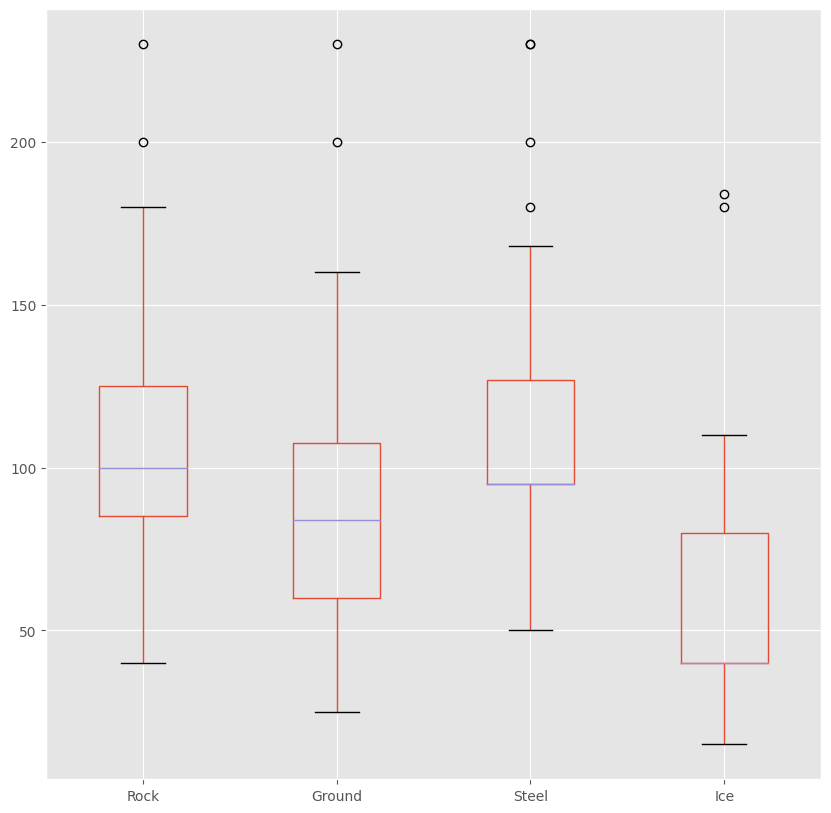

In [251]:
plt.rcParams['figure.figsize'] = (10, 10)
best_defense_pokemons.boxplot()

In [252]:
print(stats.f_oneway(*best_defense_pokemons.values.T))

F_onewayResult(statistic=28.065441333162067, pvalue=8.743104614666922e-16)


Вывод: различия в защите между группами Rock, Ground, Steel и Ice статистически незначимо.